In [191]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import requests
import gmaps
import os

# Import API key
from API_keys import g_key

In [247]:
per_capita_alcohol_df = pd.read_csv("Resources/per-capita-alcohol-1890.csv")
mental_health_data_df = pd.read_csv("Resources/share-with-mental-and-substance-disorders.csv")
happiness_data_df = pd.read_csv("Resources/happiness-cantril-ladder.csv")
wine_consumption_df = pd.read_csv("Resources/wine-consumption-per-person.csv")
alcohol_expenditure_df = pd.read_csv("Resources/alcohol-expenditure-as-share-of-total.csv")

In [402]:
merged_df = pd.read_csv("../mega_df.csv")
merged_df = merged_df.rename(columns={'continent':'Continent', 'country_code':'Country Code', 'country':'Country', 'consumption_per_capita_(L)':'Alcohol Consumption Per Capita (Liters)', 'climate':'Climate', 'main_export':'Main Export', 'main_industry':'Main Industry', 'region':'Region', 'happy_score':'Happiness Score', 'life_expectancy':'Life Expectancy', 'gdp_per_capita':'GDP per capita', 'mental_health_and_addiction (%)':'Mental Health Disorders (%)'})
merged_df.head()

,Unnamed: 0,index,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Export,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,code,Mental Health Disorders (%)
0,0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,AFG,17.553463
1,1,1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,ALB,10.987610
2,2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Oil,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,DZA,14.700388
3,3,4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Tobacco products,tourism,NaN,NaN,NaN,NaN,AND,14.726869
4,4,4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Oil,petroleum,NaN,NaN,NaN,NaN,AGO,12.498281


In [133]:
updated_df=merged_df.drop(['Unnamed: 0', 'code'], axis=1)
updated_df.head()

,index,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Export,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%)
0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463
1,1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610
2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Oil,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388
3,4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Tobacco products,tourism,NaN,NaN,NaN,NaN,14.726869
4,4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Oil,petroleum,NaN,NaN,NaN,NaN,12.498281


In [134]:
updated_df["Main Export"].value_counts().head(20)

Oil                                  11
Machinery and transport equipment     8
Petroleum                             8
Coffee                                7
Crude oil                             5
Cotton                                5
Manufactured goods                    5
Diamonds                              4
Gold                                  4
Machinery and equipment               3
Fish and fish products                3
Sugar                                 3
Cocoa                                 3
Bananas                               3
Bauxite                               3
Fish                                  3
Machinery                             3
Tobacco                               2
Copra                                 2
Agricultural products                 2
Name: Main Export, dtype: int64

In [162]:
updated_df = updated_df.replace(
    {"Crude oil": "Petroleum", "Oil": "Petroleum", "Textile products":"Textiles and clothing", "Fish":"Agricultural products", "Aluminium":"Semi-precious metals", "Vehicles":"Machinery", "Bauxite and alumina":"Semi-precious metals", "Fuels and fuel products":"Petroleum", "Soyabeans":"Agricultural products", "Garments":"Textiles and clothing", "Clothing":"Textiles and clothing", "Computers and electrical machinery":"Machinery", "Machinery and electrical equipment":"Machinery", "Peetroleum":"Petroleum", "Copra":"Semi-precious metals", "Clothing and textiles":"Textiles and clothing", "Petroleum and petroleum products":"Petroleum", "Fish and fish products":"Agricultural products", "Machinery and transport equipment":"Machinery", "Machinery and equipment":"Machinery", "Machinery and electronics":"Machinery", "Bananas":"Agricultural products", "Sugar":"Agricultural products", "Fruit":"Agricultural products", "Coffee":"Agricultural products", "Food including rice":"Agricultural products", "Tobacco products": "Manufactured goods", "Ores and metals":"Semi-precious metals", "Foodstuffs":"Agricultural products", "Tobacco":"Agricultural products", "Vanilla": "Agricultural products", "Cocoa":"Agricultural products", "Bauxite":"Semi-precious metals", "Nickel":"Semi-precious metals", "Copper":"Semi-precious metals", "Tea":"Agricultural products", "Diamonds":"Precious stones and metals", "Gold":"Precious stones and metals"})
updated_df.fillna(method='ffill')
updated_df

,index,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Export,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%)
0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463
1,1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610
2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Petroleum,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388
3,4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Manufactured goods,tourism,NaN,NaN,NaN,NaN,14.726869
4,4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Petroleum,petroleum,NaN,NaN,NaN,NaN,12.498281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,5128,Asia,UZB,Uzbekistan,2.7,"mostly mid-latitude desert, long, hot summers,...",Cotton,textiles,Commonwealth of Independent States,6.2576,65.107574,8.740372,10.897074
182,5129,South America,VEN,Venezuela,5.6,"tropical; hot, humid; more moderate in highlands",Petroleum,petroleum,Latin America and Caribbean,5.0532,66.505341,8.977794,11.014506
183,5130,Oceania,WSM,Samoa,2.5,"tropical; rainy season (November to April), dr...",Coconut oil and cream,food processing,NaN,NaN,NaN,NaN,11.152716
184,5131,Asia,YEM,Yemen,0.1,mostly desert; hot and humid along west coast;...,Petroleum,crude oil production and petroleum refining,Middle East and North Africa,3.5274,56.727283,7.759683,15.819471


In [147]:
updated_df["Main Export"].value_counts().head(30)

Agricultural products                 35
Petroleum                             27
Machinery                             19
Semi-precious metals                  12
Textiles and clothing                  9
Precious stones and metals             8
Manufactured goods                     6
Cotton                                 5
Phosphates                             2
Water                                  1
Steel products                         1
Military equipment                     1
Re-exports                             1
Electronic equipment                   1
Processed and unprocessed diamonds     1
Meat                                   1
Uranium                                1
Light manufactures                     1
Timber                                 1
Chromium and chrome products           1
Livestock                              1
Sugar and molasses                     1
Computer software                      1
Foodstuffs and tobacco                 1
Shoes           

In [148]:
top_export_data = updated_df.loc[(updated_df["Main Export"]=="Petroleum") | (updated_df["Main Export"]=="Machinery") | (updated_df["Main Export"]=="Semi-precious metals") | (updated_df["Main Export"]=="Textiles and clothing") | (updated_df["Main Export"]=="Precious stones and metals") | (updated_df["Main Export"]=="Manufactured goods")]
top_export_data

,index,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Export,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%)
2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Petroleum,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388
3,4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Manufactured goods,tourism,NaN,NaN,NaN,NaN,14.726869
4,4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Petroleum,petroleum,NaN,NaN,NaN,NaN,12.498281
5,4945,North America,ATG,Antigua and Barbuda,7.0,tropical maritime; little seasonal temperature...,Textiles and clothing,tourism,NaN,NaN,NaN,NaN,13.159940
6,4946,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",Petroleum,petroleum and natural gas,Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,5124,Africa,TZA,Tanzania,9.4,varies from tropical along coast to temperate ...,Precious stones and metals,agricultural processing (sugar,Sub-Saharan Africa,3.4762,57.496075,7.967665,12.637257
178,5125,North America,USA,United States,9.8,"mostly temperate, but tropical in Hawaii and F...",Machinery,highly diversified,North America and ANZ,6.9396,68.299500,10.925769,17.080892
182,5129,South America,VEN,Venezuela,5.6,"tropical; hot, humid; more moderate in highlands",Petroleum,petroleum,Latin America and Caribbean,5.0532,66.505341,8.977794,11.014506
184,5131,Asia,YEM,Yemen,0.1,mostly desert; hot and humid along west coast;...,Petroleum,crude oil production and petroleum refining,Middle East and North Africa,3.5274,56.727283,7.759683,15.819471


In [150]:
top_export_data_grouped=top_export_data.groupby("Main Export")[["Alcohol Consumption Per Capita (Liters)"]].mean()
top_export_data_grouped

,Alcohol Consumption Per Capita (Liters)
Main Export,
Machinery,10.510526
Manufactured goods,10.050000
Petroleum,4.033333
Precious stones and metals,6.537500
Semi-precious metals,5.091667
Textiles and clothing,5.933333


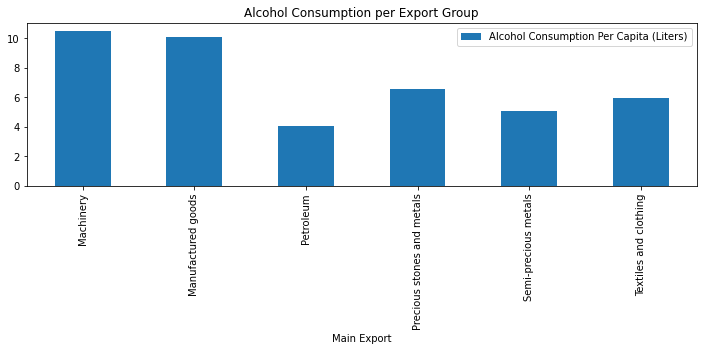

In [154]:
# plt.bar(top_export_data_grouped, color='r', alpha=0.5, align="center")
top_export_data_grouped.plot(kind='bar', figsize=(12,3), title ='Alcohol Consumption per Export Group')

In [174]:
gdp_and_life_expectancy_df=updated_df.dropna(subset=['GDP per capita', 'Life Expectancy'])
gdp_and_life_expectancy_df.head()

,index,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Export,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%)
0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463
1,1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610
2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Petroleum,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388
6,4946,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",Petroleum,petroleum and natural gas,Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815
7,4948,South America,ARG,Argentina,9.8,mostly temperate; arid in southeast; subantarc...,Food and live animals,food processing,Latin America and Caribbean,5.9747,68.803802,9.810955,15.491235


In [206]:
gdp_and_life_expectancy_df["Region"].value_counts().head(15)

Sub-Saharan Africa                    34
Latin America and Caribbean           21
Western Europe                        20
Middle East and North Africa          16
Central and Eastern Europe            14
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
North America and ANZ                  4
East Asia                              4
Name: Region, dtype: int64

In [186]:
gdp_and_life_expectancy_df["Main Industry"].value_counts().head(25)

tourism                                                              10
textiles                                                              9
petroleum                                                             8
food processing                                                       8
sugar                                                                 5
mining                                                                4
construction                                                          2
oil                                                                   2
aluminum                                                              2
petroleum and natural gas                                             2
fish processing                                                       2
electronics                                                           2
machinery                                                             2
steel                                                           

In [182]:
petroleum_export_data = gdp_and_life_expectancy_df.loc[(gdp_and_life_expectancy_df["Main Export"]=="Petroleum")]

In [183]:
tourism_industry_data = gdp_and_life_expectancy_df.loc[(gdp_and_life_expectancy_df["Main Industry"]=="tourism")]

In [337]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, edgecolors='k')
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel('Alcohol Consumption Per Capita (Liters)')
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 0.20507265852518977


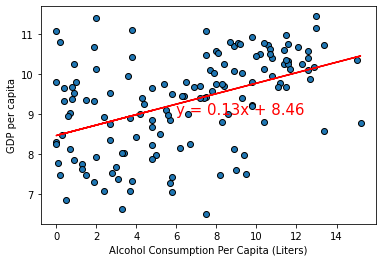

In [342]:
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['GDP per capita']
plot_linear_regression(x_values,y_values,'GDP per capita',(6,9))

The r-value is: 0.15718368589991474


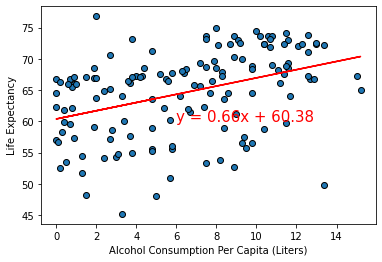

In [343]:
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Life Expectancy']
plot_linear_regression(x_values,y_values,'Life Expectancy',(6,60))

The r-value is: 0.18116385485317182


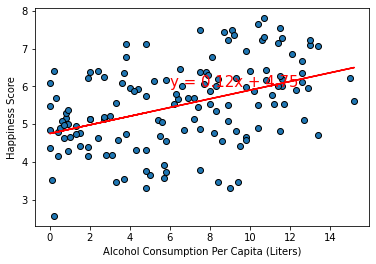

In [344]:
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Happiness Score']
plot_linear_regression(x_values,y_values,'Happiness Score',(6,6))

The r-value is: 0.007723890876234616


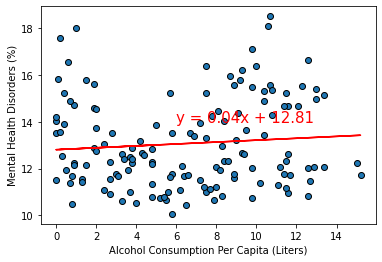

In [345]:
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Mental Health Disorders (%)']
plot_linear_regression(x_values,y_values,'Mental Health Disorders (%)',(6,14))

In [193]:
group1 = gdp_and_life_expectancy_df[gdp_and_life_expectancy_df["Main Industry"] == "tourism"]["Alcohol Consumption Per Capita (Liters)"]
group2 = gdp_and_life_expectancy_df[gdp_and_life_expectancy_df["Main Industry"] == "textiles"]["Alcohol Consumption Per Capita (Liters)"]
group3 = gdp_and_life_expectancy_df[gdp_and_life_expectancy_df["Main Industry"] == "petroleum"]["Alcohol Consumption Per Capita (Liters)"]
group4 = gdp_and_life_expectancy_df[gdp_and_life_expectancy_df["Main Industry"] == "food processing"]["Alcohol Consumption Per Capita (Liters)"]

In [194]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=4.390411881822701, pvalue=0.010961156364986614)

In [196]:
main_industry_data = gdp_and_life_expectancy_df.loc[(gdp_and_life_expectancy_df["Main Industry"]=="tourism") | (gdp_and_life_expectancy_df["Main Industry"]=="textiles") | (gdp_and_life_expectancy_df["Main Industry"]=="petroleum") | (gdp_and_life_expectancy_df["Main Industry"]=="food processing")]

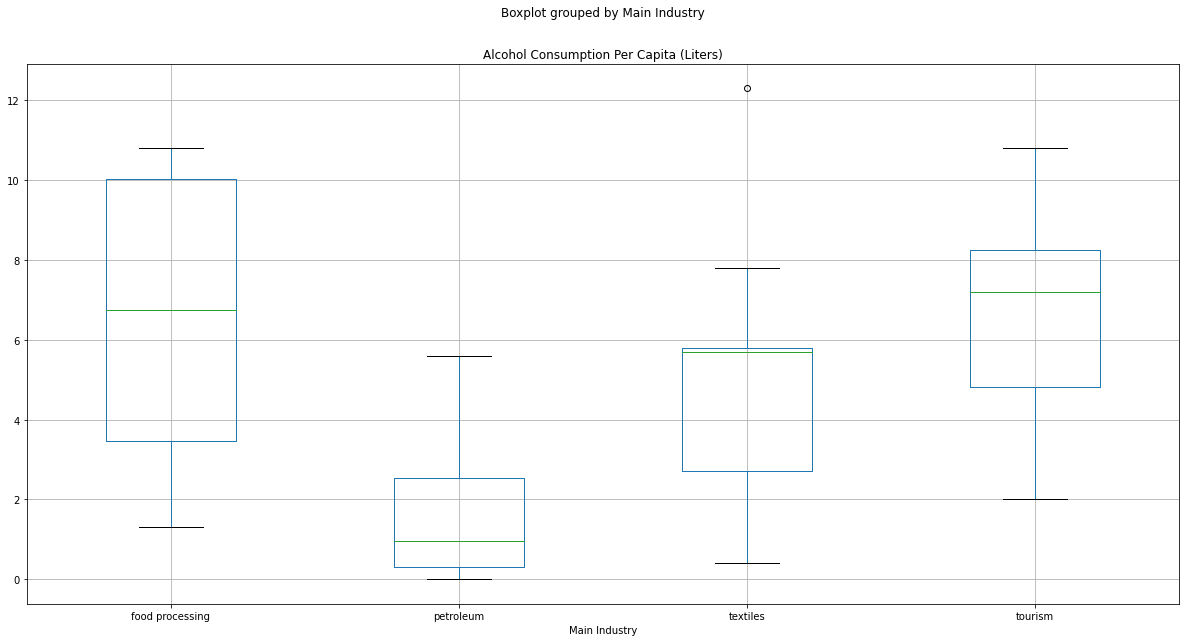

In [197]:
main_industry_data.boxplot("Alcohol Consumption Per Capita (Liters)", by="Main Industry", figsize=(20, 10))

In [236]:
updated_df_countries_by_continent=updated_df["Continent"].value_counts()
updated_df_countries_by_continent

Africa           53
Europe           46
Asia             40
North America    23
South America    12
Oceania          12
Name: Continent, dtype: int64

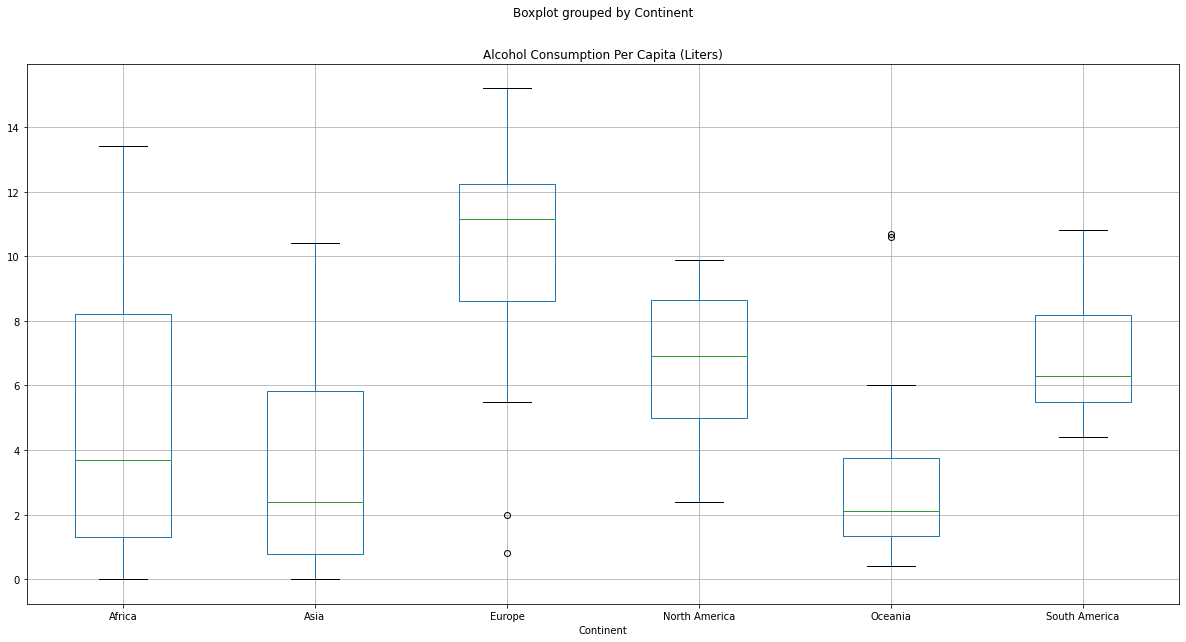

In [201]:
updated_df.boxplot("Alcohol Consumption Per Capita (Liters)", by="Continent", figsize=(20, 10))

In [202]:
group1 = updated_df[updated_df["Continent"] == "Africa"]["Alcohol Consumption Per Capita (Liters)"]
group2 = updated_df[updated_df["Continent"] == "Asia"]["Alcohol Consumption Per Capita (Liters)"]
group3 = updated_df[updated_df["Continent"] == "Europe"]["Alcohol Consumption Per Capita (Liters)"]
group4 = updated_df[updated_df["Continent"] == "North America"]["Alcohol Consumption Per Capita (Liters)"]
group5 = updated_df[updated_df["Continent"] == "Oceania"]["Alcohol Consumption Per Capita (Liters)"]
group6 = updated_df[updated_df["Continent"] == "South America"]["Alcohol Consumption Per Capita (Liters)"]

In [203]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=39.0908735441233, pvalue=5.946781924844183e-19)

In [204]:
stats.ttest_ind(group3, group5)

Ttest_indResult(statistic=6.739906169357296, pvalue=9.301922597184508e-09)

Africa's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)
Asia's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)
Europe's potential outliers: 6      0.8
169    2.0
Name: Alcohol Consumption Per Capita (Liters), dtype: float64
North America's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)
Oceania's potential outliers: 8      10.6
120    10.7
Name: Alcohol Consumption Per Capita (Liters), dtype: float64
South America's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)


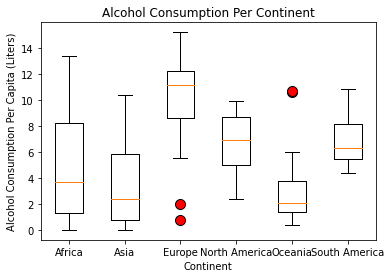

In [214]:
continents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]

# Create empty list to fill with tumor vol data (for plotting)
alcohol_consumption_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for continent in continents:
      
    # Locate the rows which contain mice on each drug and get the tumor volumes
    alcohol_by_continent=updated_df.loc[updated_df["Continent"]==continent, "Alcohol Consumption Per Capita (Liters)"]
    
    # add subset 
    alcohol_consumption_data.append(alcohol_by_continent)

    quartiles = alcohol_by_continent.quantile([.25,.5,.75])
    lower_q=quartiles[0.25]
    upper_q=quartiles[0.75]
    iqr=upper_q-lower_q
    lower_bound=lower_q - (1.5*iqr)
    upper_bound=upper_q + (1.5*iqr)
    outliers=alcohol_by_continent.loc[(alcohol_by_continent<lower_bound)|(alcohol_by_continent>upper_bound)]
    print(f"{continent}'s potential outliers: {outliers}")
    
rate=dict(markerfacecolor='red', markersize=10)
plt.boxplot(alcohol_consumption_data, labels=continents, flierprops=rate)
plt.ylabel('Alcohol Consumption Per Capita (Liters)')
plt.xlabel('Continent')
plt.title('Alcohol Consumption Per Continent')
plt.show()

In [218]:
alcohol_by_continent_sum=updated_df.groupby("Continent")[["Alcohol Consumption Per Capita (Liters)"]].sum()
alcohol_by_continent_sum

,Alcohol Consumption Per Capita (Liters)
Continent,
Africa,252.7
Asia,137.6
Europe,473.4
North America,157.3
Oceania,42.5
South America,83.2


<ipython-input-239-c37401c2cf16>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(alcohol_by_continent_sum, labels=continents, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7fc54fda6a90>,
 [Text(0.8467456254153936, 0.7021551437110564, 'Africa'),
  Text(-0.2086293354511101, 1.0800341663064315, 'Asia'),
  Text(-1.0528118350214484, -0.31872753260233183, 'Europe'),
  Text(0.47954029770548146, -0.9899702535311545, 'North America'),
  Text(0.9247119831680095, -0.5957413433575742, 'Oceania'),
  Text(1.0715470782973886, -0.24856962604536018, 'South America')],
 [Text(0.46186125022657826, 0.38299371475148525, '22.0%'),
  Text(-0.11379781933696911, 0.5891095452580534, '12.0%'),
  Text(-0.57426100092079, -0.1738513814194537, '41.3%'),
  Text(0.26156743511208075, -0.5399837746533569, '13.7%'),
  Text(0.5043883544552779, -0.3249498236495859, '3.7%'),
  Text(0.5844802245258482, -0.13558343238837825, '7.3%')])

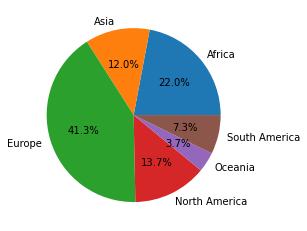

In [239]:
plt.pie(alcohol_by_continent_sum, labels=continents, autopct='%1.1f%%')

<ipython-input-240-3afac84a7c18>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(alcohol_by_continent_mean, labels=continents, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7fc55012e490>,
 [Text(1.0051820037963315, 0.44677638617544707, 'Africa'),
  Text(0.46109470062371827, 0.9986949869988954, 'Asia'),
  Text(-0.7673176573487064, 0.7881773992705535, 'Europe'),
  Text(-0.838559517633741, -0.711911465974434, 'North America'),
  Text(0.04807197041236565, -1.098949082378557, 'Oceania'),
  Text(0.9027453275847895, -0.6285307259982054, 'South America')],
 [Text(0.5482810929798171, 0.24369621064115293, '13.3%'),
  Text(0.25150620034020993, 0.5447427201812156, '9.6%'),
  Text(-0.4185369040083852, 0.4299149450566655, '28.7%'),
  Text(-0.4573961005274951, -0.38831534507696397, '19.1%'),
  Text(0.02622107477038126, -0.5994267722064857, '9.9%'),
  Text(0.49240654231897607, -0.3428349414535665, '19.4%')])

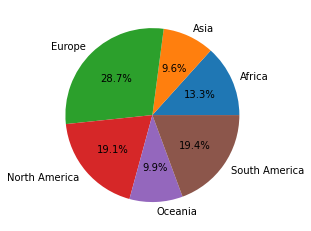

In [240]:
alcohol_by_continent_mean=updated_df.groupby("Continent")[["Alcohol Consumption Per Capita (Liters)"]].mean()
plt.pie(alcohol_by_continent_mean, labels=continents, autopct='%1.1f%%')

In [238]:
gdp_and_life_expectancy_df_countries_by_continent=gdp_and_life_expectancy_df["Continent"].value_counts()
gdp_and_life_expectancy_df_countries_by_continent

Europe           43
Africa           39
Asia             34
North America    13
South America    10
Oceania           2
Name: Continent, dtype: int64

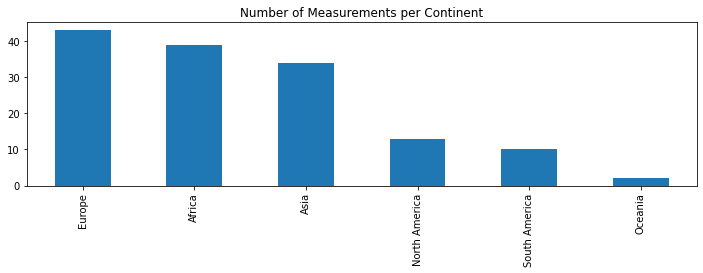

In [243]:
gdp_and_life_expectancy_df_countries_by_continent.plot(kind='bar', figsize=(12,3), title ='Number of Measurements per Continent')

In [241]:
gdp_and_life_expectancy_df.describe()

,index,Alcohol Consumption Per Capita (Liters),Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,4967.858156,6.480142,5.497109,64.637501,9.309033,13.068401
std,600.336222,4.112111,1.112771,6.814233,1.192886,1.892776
min,0.000000,0.000000,2.566900,45.200001,6.492642,10.067097
25%,4993.000000,2.800000,4.729300,59.599152,8.350645,11.630930
50%,5039.000000,6.600000,5.541500,66.404343,9.500369,12.526669
75%,5082.000000,9.800000,6.228500,69.002548,10.263742,14.536026
max,5132.000000,15.200000,7.808700,76.804581,11.450681,18.495605


In [242]:
agg_alcohol_df=updated_df.groupby("Continent")["Alcohol Consumption Per Capita (Liters)"].agg(['mean','median', 'var', 'std', 'sem'])
agg_alcohol_df

,mean,median,var,std,sem
Continent,,,,,
Africa,4.767925,3.70,14.059913,3.749655,0.515055
Asia,3.440000,2.40,9.578872,3.094975,0.489359
Europe,10.291304,11.15,8.688367,2.947604,0.434600
North America,6.839130,6.90,4.957036,2.226440,0.464245
Oceania,3.541667,2.10,13.048106,3.612216,1.042757
South America,6.933333,6.30,4.344242,2.084285,0.601681


In [227]:
life_expectancy_by_continent_mean=gdp_and_life_expectancy_df.groupby("Continent")[["Life Expectancy"]].mean()
life_expectancy_by_continent_mean

,Life Expectancy
Continent,
Africa,56.636795
Asia,65.107686
Europe,69.805096
North America,66.825558
Oceania,73.403584
South America,67.423274


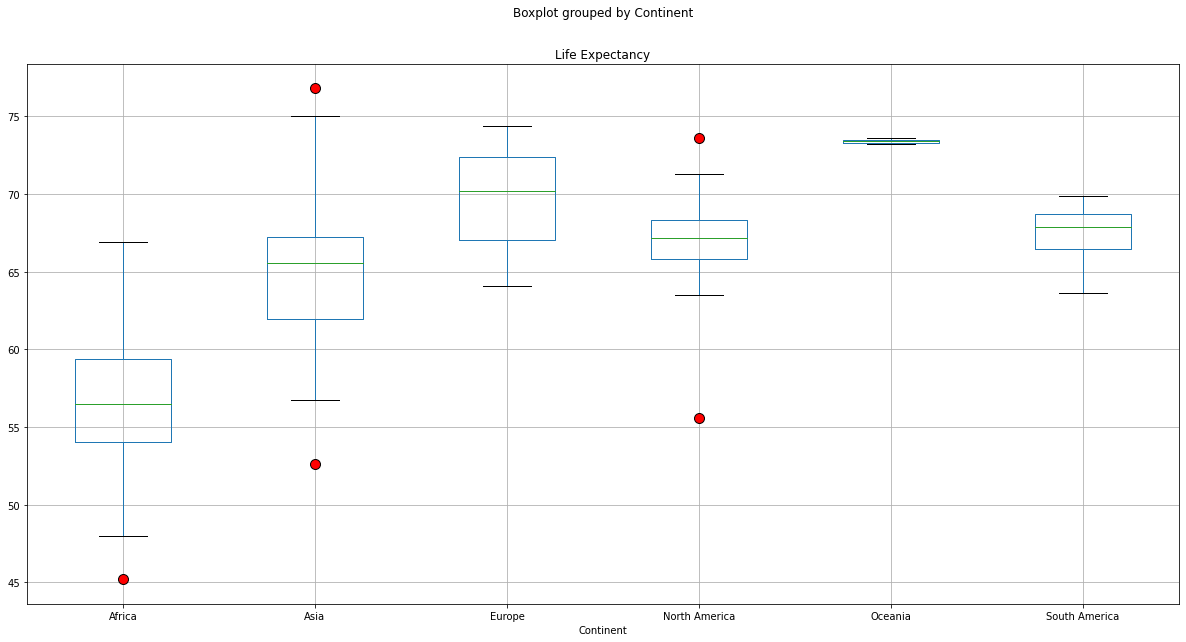

In [232]:
gdp_and_life_expectancy_df.boxplot("Life Expectancy", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

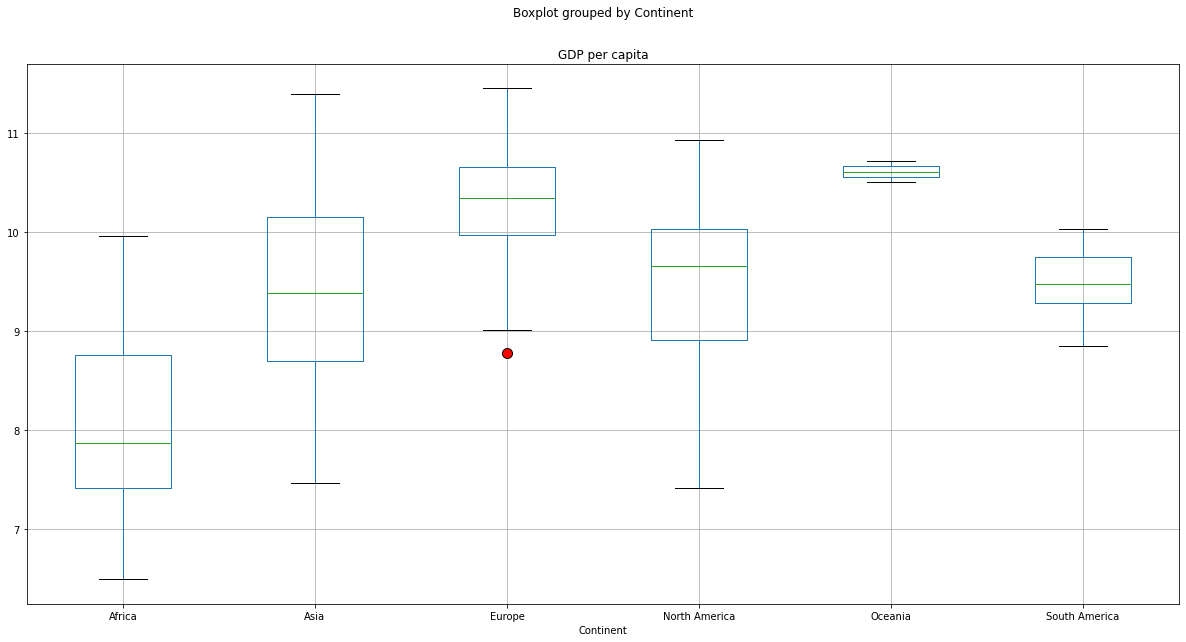

In [234]:
gdp_and_life_expectancy_df.boxplot("GDP per capita", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [267]:
wine_consumption_df=wine_consumption_df.rename(columns={"Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Wine":"Wine Consumption per capita (Liters)"})

In [276]:
wine_latest_timepoint_per_country=wine_consumption_df.groupby("Entity")[["Year"]].max()
len(wine_latest_timepoint_per_country)

189

In [269]:
merged_updated_timepoint_wine_df = wine_latest_timepoint_per_country.merge(wine_consumption_df, on = ["Entity", "Year"], how="left")
merged_updated_timepoint_wine_df.head()

,Entity,Year,Code,Wine Consumption per capita (Liters)
0,Afghanistan,2013,AFG,0.00
1,Albania,2014,ALB,1.14
2,Algeria,2013,DZA,0.22
3,Andorra,2013,AND,4.29
4,Angola,2014,AGO,1.32


In [272]:
wine_average_consumption_per_country=wine_consumption_df.groupby("Entity")[["Wine Consumption per capita (Liters)"]].mean()
wine_average_consumption_per_country

,Wine Consumption per capita (Liters)
Entity,
Afghanistan,0.000377
Albania,0.601698
Algeria,0.429245
Andorra,5.221429
Angola,1.520000
...,...
Venezuela,0.120370
Vietnam,0.003519
Yemen,0.000000


In [297]:
merged_updated_timepoint_average_wine_df = merged_updated_timepoint_wine_df.merge(wine_average_consumption_per_country, on = ["Entity"], how="left")
merged_updated_timepoint_average_wine_df=merged_updated_timepoint_average_wine_df.rename(columns={"Wine Consumption per capita (Liters)_x":"Wine Consumption at Latest Timepoint(L)", "Wine Consumption per capita (Liters)_y":"Wine Consumption Average Over The Years(L)", "Year":"Latest Year for Wine Consumption Data"})
merged_updated_timepoint_average_wine_df.sample(5)

,Entity,Latest Year for Wine Consumption Data,Code,Wine Consumption at Latest Timepoint(L),Wine Consumption Average Over The Years(L)
87,Kazakhstan,2014,KAZ,0.35,0.375200
76,Iceland,2014,ISL,2.03,1.038889
65,Germany,2014,DEU,3.10,3.115000
94,Lebanon,2014,LBN,0.16,0.594074
28,Cambodia,2011,KHM,0.02,0.007000


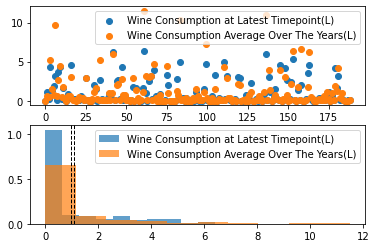

In [288]:
# Scatter Plot of Data
last_timepoint_wine=merged_updated_timepoint_average_wine_df["Wine Consumption at Latest Timepoint(L)"]
average_wine=merged_updated_timepoint_average_wine_df["Wine Consumption Average Over The Years(L)"]
    
plt.subplot(2,1,1)
plt.scatter(range(len(last_timepoint_wine)), last_timepoint_wine, label="Wine Consumption at Latest Timepoint(L)")
plt.scatter(range(len(average_wine)), average_wine, label="Wine Consumption Average Over The Years(L)")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(last_timepoint_wine, 10, density=True, alpha=0.7, label="Wine Consumption at Latest Timepoint(L)")
plt.hist(average_wine, 10, density=True, alpha=0.7, label="Wine Consumption Average Over The Years(L)")
plt.axvline(last_timepoint_wine.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(average_wine.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [289]:
stats.ttest_ind(last_timepoint_wine, average_wine, equal_var=False)

Ttest_indResult(statistic=-0.6190622697626872, pvalue=0.5362811196901257)

In [358]:
merged_with_wine_nonull_df = gdp_and_life_expectancy_df.merge(merged_updated_timepoint_average_wine_df, left_on="Country", right_on="Entity", how="inner")
merged_with_wine_nonull_df=merged_with_wine_nonull_df.drop(['index', 'Code', 'Main Export', 'Entity'], axis=1)
merged_with_wine_nonull_df

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Latest Year for Wine Consumption Data,Wine Consumption at Latest Timepoint(L),Wine Consumption Average Over The Years(L)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463,2013,0.00,0.000377
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,2014,1.14,0.601698
2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388,2013,0.22,0.429245
3,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",petroleum and natural gas,Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815,2013,0.23,0.459167
4,South America,ARG,Argentina,9.8,mostly temperate; arid in southeast; subantarc...,food processing,Latin America and Caribbean,5.9747,68.803802,9.810955,15.491235,2014,3.22,9.673333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,South America,URY,Uruguay,10.8,warm temperate; freezing temperatures almost u...,food processing,Latin America and Caribbean,6.4401,69.002548,9.948193,15.357220,2014,3.13,4.128889
137,Asia,UZB,Uzbekistan,2.7,"mostly mid-latitude desert, long, hot summers,...",textiles,Commonwealth of Independent States,6.2576,65.107574,8.740372,10.897074,2011,0.13,0.337500
138,South America,VEN,Venezuela,5.6,"tropical; hot, humid; more moderate in highlands",petroleum,Latin America and Caribbean,5.0532,66.505341,8.977794,11.014506,2014,0.06,0.120370
139,Asia,YEM,Yemen,0.1,mostly desert; hot and humid along west coast;...,crude oil production and petroleum refining,Middle East and North Africa,3.5274,56.727283,7.759683,15.819471,2013,0.00,0.000000


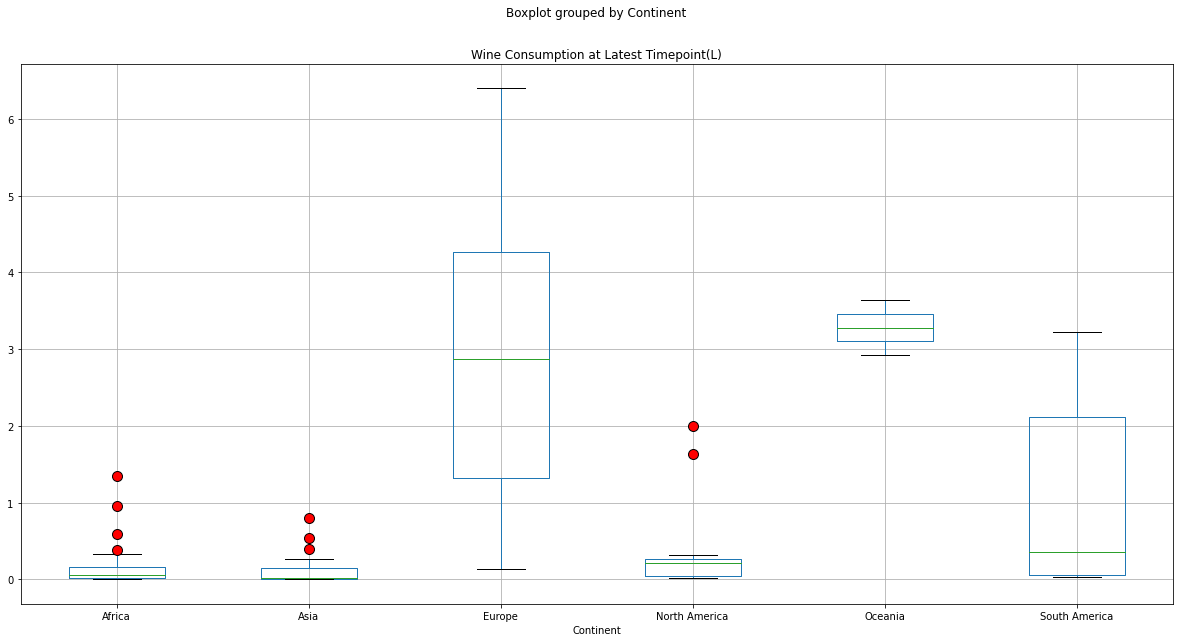

In [359]:
merged_with_wine_nonull_df.boxplot("Wine Consumption at Latest Timepoint(L)", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [362]:
merged_with_wine_europe_df=merged_with_wine_nonull_df.loc[(merged_with_wine_nonull_df["Continent"]=="Europe")]
merged_with_wine_europe_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Latest Year for Wine Consumption Data,Wine Consumption at Latest Timepoint(L),Wine Consumption Average Over The Years(L)
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,2014,1.14,0.601698
3,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",petroleum and natural gas,Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815,2013,0.23,0.459167
6,Europe,AUT,Austria,11.6,"temperate; continental, cloudy; cold winters w...",construction,Western Europe,7.2942,73.002502,10.742824,14.648111,2014,4.37,4.496909
9,Europe,ARM,Armenia,5.5,"highland continental, hot summers, cold winters",diamond-processing,Commonwealth of Independent States,4.6768,66.750656,9.100476,10.644284,2014,0.13,0.559600
10,Europe,BEL,Belgium,12.1,"temperate; mild winters, cool summers; rainy, ...",engineering and metal products,Western Europe,6.8635,72.001648,10.673639,14.658975,2014,4.53,3.019231


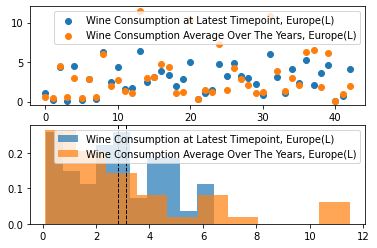

In [366]:
# Scatter Plot of Data
last_timepoint_wine_europe=merged_with_wine_europe_df["Wine Consumption at Latest Timepoint(L)"]
average_wine_europe=merged_with_wine_europe_df["Wine Consumption Average Over The Years(L)"]
    
plt.subplot(2,1,1)
plt.scatter(range(len(last_timepoint_wine_europe)), last_timepoint_wine_europe, label="Wine Consumption at Latest Timepoint, Europe(L)")
plt.scatter(range(len(average_wine_europe)), average_wine_europe, label="Wine Consumption Average Over The Years, Europe(L)")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(last_timepoint_wine_europe, 10, density=True, alpha=0.7, label="Wine Consumption at Latest Timepoint, Europe(L)")
plt.hist(average_wine_europe, 10, density=True, alpha=0.7, label="Wine Consumption Average Over The Years, Europe(L)")
plt.axvline(last_timepoint_wine_europe.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(average_wine_europe.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [367]:
stats.ttest_ind(last_timepoint_wine_europe, average_wine_europe, equal_var=False)

Ttest_indResult(statistic=-0.5686282351313894, pvalue=0.5714190097573242)

In [368]:
wine_by_continent_sum=merged_with_wine_nonull_df.groupby("Continent")[["Wine Consumption at Latest Timepoint(L)"]].sum()
wine_by_continent_sum

,Wine Consumption at Latest Timepoint(L)
Continent,
Africa,5.87
Asia,3.43
Europe,121.61
North America,5.19
Oceania,6.56
South America,10.44


<ipython-input-369-d635609c1daa>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(wine_by_continent_sum, labels=continents, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7fc534627130>,
 [Text(1.0920299127175113, 0.13217666106459458, 'Africa'),
  Text(1.0471343653079055, 0.33691188906182873, 'Asia'),
  Text(-1.0617453147233422, 0.28757066377332563, 'Europe'),
  Text(0.7630770797608414, -0.7922836426076628, 'North America'),
  Text(0.9301850866664672, -0.5871590112936164, 'Oceania'),
  Text(1.0748549721104654, -0.23385206633555936, 'South America')],
 [Text(0.595652679664097, 0.07209636058068794, '3.8%'),
  Text(0.5711641992588575, 0.183770121306452, '2.2%'),
  Text(-0.5791338080309139, 0.15685672569454123, '79.4%'),
  Text(0.4162238616877316, -0.4321547141496342, '3.4%'),
  Text(0.5073736836362548, -0.3202685516146998, '4.3%'),
  Text(0.5862845302420719, -0.12755567254666872, '6.8%')])

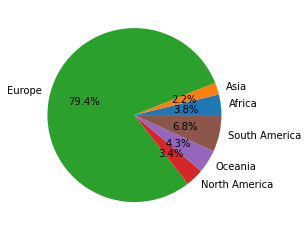

In [369]:
plt.pie(wine_by_continent_sum, labels=continents, autopct='%1.1f%%')

<ipython-input-370-7a8a252d9cbd>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(wine_by_continent_mean, labels=continents, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7fc535fe1a60>,
 [Text(1.0979807997424704, 0.06661954215457436, 'Africa'),
  Text(1.0856295380103098, 0.17722445147191626, 'Asia'),
  Text(0.25043132202286916, 1.0711135107680596, 'Europe'),
  Text(-0.9647847201467948, 0.5283847497527451, 'North America'),
  Text(-0.6124517839881563, -0.9137301638283182, 'Oceania'),
  Text(1.0042448325568147, -0.4488789550457176, 'South America')],
 [Text(0.5988986180413475, 0.03633793208431328, '1.9%'),
  Text(0.5921615661874416, 0.09666788262104523, '1.3%'),
  Text(0.13659890292156499, 0.5842437331462143, '36.2%'),
  Text(-0.5262462109891608, 0.28820986350149724, '5.1%'),
  Text(-0.3340646094480852, -0.49839827117908253, '42.0%'),
  Text(0.5477699086673534, -0.24484306638857323, '13.4%')])

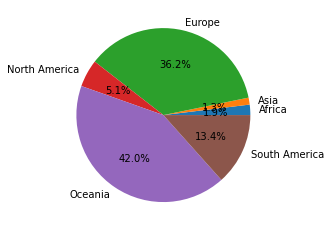

In [370]:
wine_by_continent_mean=merged_with_wine_nonull_df.groupby("Continent")[["Wine Consumption at Latest Timepoint(L)"]].mean()
plt.pie(wine_by_continent_mean, labels=continents, autopct='%1.1f%%')

In [371]:
wine_consumption_df.head()

,Entity,Code,Year,Wine Consumption per capita (Liters)
0,Afghanistan,AFG,1961,0.0
1,Afghanistan,AFG,1962,0.0
2,Afghanistan,AFG,1963,0.0
3,Afghanistan,AFG,1964,0.0
4,Afghanistan,AFG,1965,0.0


In [356]:
merged_with_wine_years_df = gdp_and_life_expectancy_df.merge(wine_consumption_df, left_on="Country", right_on="Entity", how="inner")
merged_with_wine_years_df=merged_with_wine_years_df.drop(['index', 'Code', 'Main Export', 'Entity'], axis=1)
merged_with_wine_years_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Year,Wine Consumption per capita (Liters)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,small-scale production of bricks,South Asia,2.5669,52.59,7.462861,17.553463,1961,0.0
1,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,small-scale production of bricks,South Asia,2.5669,52.59,7.462861,17.553463,1962,0.0
2,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,small-scale production of bricks,South Asia,2.5669,52.59,7.462861,17.553463,1963,0.0
3,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,small-scale production of bricks,South Asia,2.5669,52.59,7.462861,17.553463,1964,0.0
4,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,small-scale production of bricks,South Asia,2.5669,52.59,7.462861,17.553463,1965,0.0


In [319]:
wine_and_years_data_europe = merged_with_wine_years_df.loc[(merged_with_wine_years_df["Continent"]=="Europe")]
wine_and_years_data_europe

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Year,Wine Consumption per capita (Liters)
53,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,1962,0.28
54,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,1963,0.19
55,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,1964,0.26
56,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,1965,0.21
57,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,1966,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6425,Europe,GBR,United Kingdom,11.4,temperate; moderated by prevailing southwest w...,machine tools,Western Europe,7.1645,72.301605,10.600135,14.663859,2011,3.95
6426,Europe,GBR,United Kingdom,11.4,temperate; moderated by prevailing southwest w...,machine tools,Western Europe,7.1645,72.301605,10.600135,14.663859,2012,3.96
6427,Europe,GBR,United Kingdom,11.4,temperate; moderated by prevailing southwest w...,machine tools,Western Europe,7.1645,72.301605,10.600135,14.663859,2013,4.03
6428,Europe,GBR,United Kingdom,11.4,temperate; moderated by prevailing southwest w...,machine tools,Western Europe,7.1645,72.301605,10.600135,14.663859,2014,4.06


In [321]:
wine_and_years_data_europe.describe()

,Alcohol Consumption Per Capita (Liters),Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Year,Wine Consumption per capita (Liters)
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,10.356149,6.388887,70.440246,10.364156,13.741740,1990.258900,3.345162
std,2.719870,0.895974,3.067892,0.539725,1.953312,15.240821,3.381300
min,0.800000,4.560700,64.100456,8.776714,10.495815,1960.000000,0.000000
25%,8.750000,5.674100,67.609970,10.128872,11.747320,1978.000000,0.940000
50%,11.200000,6.363400,72.199997,10.405703,14.536026,1992.000000,2.400000
75%,12.300000,7.237500,72.600769,10.742824,15.327498,2003.000000,4.500000
max,15.200000,7.808700,74.402710,11.450681,16.640201,2015.000000,20.560000


## Europe Wine Consumption Over The Years

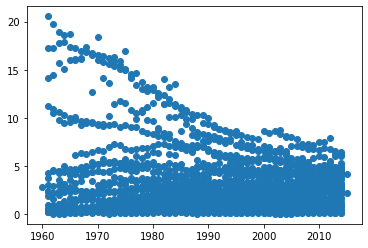

In [320]:
plt.scatter(wine_and_years_data_europe["Year"], wine_and_years_data_europe["Wine Consumption per capita (Liters)"])
plt.title="Wine Consumption Over The Years in Europe"
plt.show()

## World Wine Consumption Over The Years

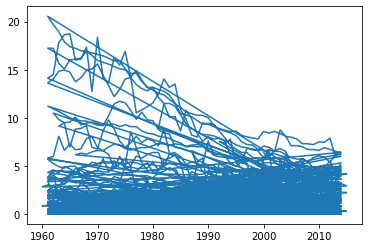

In [312]:
plt.plot(wine_consumption_df["Year"], wine_consumption_df["Wine Consumption per capita (Liters)"])
plt.title="Wine Consumption Over The Years"
plt.show()

In [363]:
def plot_wine_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, edgecolors='k')
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel('Wine Consumption Per Capita (Liters)')
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 0.12392540422792007


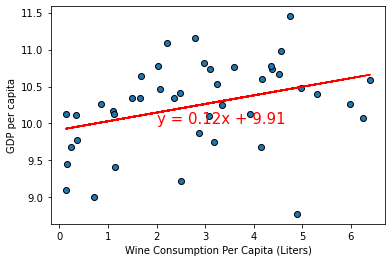

In [364]:
x_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
y_values=merged_with_wine_europe_df['GDP per capita']
plot_wine_linear_regression(x_values,y_values,'GDP per capita',(2,10))

The r-value is: 0.31563005361696045


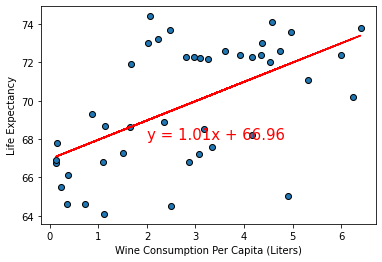

In [381]:
x_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
y_values=merged_with_wine_europe_df['Life Expectancy']
plot_wine_linear_regression(x_values,y_values,'Life Expectancy',(2,68))

The r-value is: 0.27600880504650505


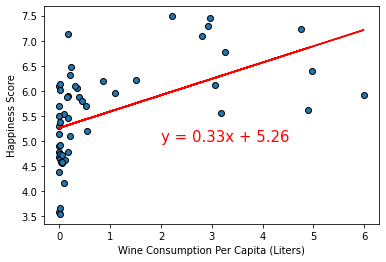

In [352]:
x_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
y_values=merged_with_wine_europe_df['Happiness Score']
plot_wine_linear_regression(x_values,y_values,'Happiness Score',(2,5))

The r-value is: 0.10099913915868275


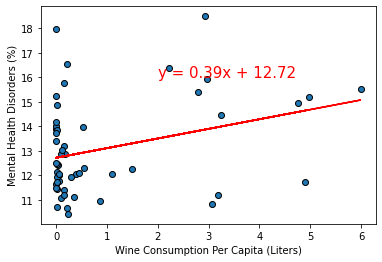

In [354]:
x_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
y_values=merged_with_wine_europe_df['Mental Health Disorders (%)']
plot_wine_linear_regression(x_values,y_values,'Mental Health Disorders (%)',(2,16))

In [382]:
def plot_social_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, edgecolors='k')
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel(title)
    plt.ylabel('Wine Consumption Per Capita (Liters)')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 0.12392540422792007


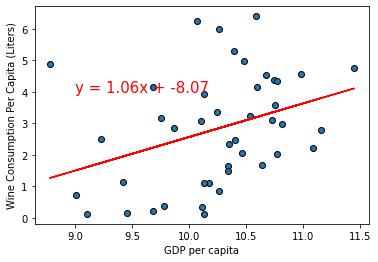

In [388]:
x_values=merged_with_wine_europe_df['GDP per capita']
y_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
plot_social_linear_regression(x_values,y_values,'GDP per capita',(9,4))

The r-value is: 0.31563005361696045


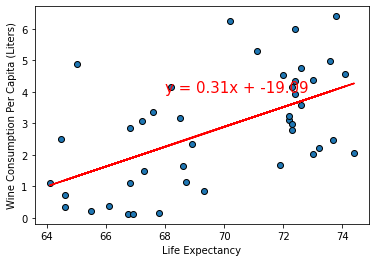

In [390]:
x_values=merged_with_wine_europe_df['Life Expectancy']
y_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
plot_social_linear_regression(x_values,y_values,'Life Expectancy',(68,4))

The r-value is: 0.14178448062606994


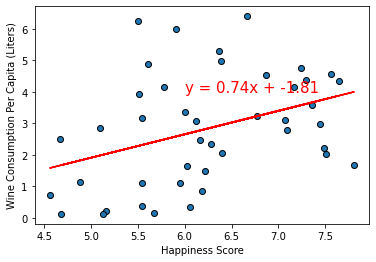

In [392]:
x_values=merged_with_wine_europe_df['Happiness Score']
y_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
plot_social_linear_regression(x_values,y_values,'Happiness Score',(6,4))

The r-value is: 0.1744547100342905


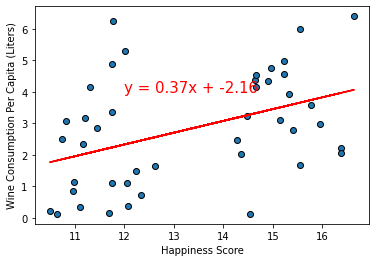

In [394]:
x_values=merged_with_wine_europe_df['Mental Health Disorders (%)']
y_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
plot_social_linear_regression(x_values,y_values,'Happiness Score',(12,4))

In [377]:
alcohol_by_continent_sum

,Alcohol Consumption Per Capita (Liters)
Continent,
Africa,252.7
Asia,137.6
Europe,473.4
North America,157.3
Oceania,42.5
South America,83.2


In [1]:
continents = alcohol_by_continents_sum['Continent']

NameError: name 'alcohol_by_continents_sum' is not defined

In [ ]:
plt.bar(continents, [100 for i,_ in enumerate(continents)], edgecolor='black', fill=False)
plt.bar(continents, wine_percent_of_all_alc, edgecolor='black', color='brown')

plt.title('Wine consumed as a % of total alcohol consumed by Continent', fontsize=13)
plt.xlabel('Continents')
plt.xticks(rotation=45)
plt.ylabel('Wine Conumsed (%)');

In [395]:
merged_with_wine_nonull_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Latest Year for Wine Consumption Data,Wine Consumption at Latest Timepoint(L),Wine Consumption Average Over The Years(L)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463,2013,0.00,0.000377
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,2014,1.14,0.601698
2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388,2013,0.22,0.429245
3,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",petroleum and natural gas,Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815,2013,0.23,0.459167
4,South America,ARG,Argentina,9.8,mostly temperate; arid in southeast; subantarc...,food processing,Latin America and Caribbean,5.9747,68.803802,9.810955,15.491235,2014,3.22,9.673333


In [399]:
merged_with_wine_final_df=merged_with_wine_nonull_df.drop(['Latest Year for Wine Consumption Data', 'Wine Consumption Average Over The Years(L)'], axis=1)
merged_with_wine_final_df=merged_with_wine_final_df.rename(columns={"Wine Consumption at Latest Timepoint(L)":"Wine Consumption per capita (Liters)"})
merged_with_wine_final_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463,0.00
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,1.14
2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388,0.22
3,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",petroleum and natural gas,Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815,0.23
4,South America,ARG,Argentina,9.8,mostly temperate; arid in southeast; subantarc...,food processing,Latin America and Caribbean,5.9747,68.803802,9.810955,15.491235,3.22


In [401]:
merged_with_wine_final_df.to_csv("merged_with_wine_final_df.csv")